# Xarray

In [39]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import geopandas as gpd
from sys import getsizeof
plt.rcParams['figure.dpi'] = 100

## Construct dataset

In [40]:
# data array
data = np.random.rand(4, 3)
locs = ['CO', 'KS', 'NE']
times = pd.date_range('2000-01-01', periods=4)
foo = xr.DataArray(data, coords=[times, locs], dims=['time', 'space'])
print(foo)

<xarray.DataArray (time: 4, space: 3)>
array([[0.71603171, 0.41366423, 0.75223793],
       [0.24514777, 0.88733048, 0.07388591],
       [0.41699171, 0.3517874 , 0.41524566],
       [0.88407501, 0.65617214, 0.75090502]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'CO' 'KS' 'NE'


In [41]:
# using tuples
print(xr.DataArray(data, coords=[('time', times), ('space', locs)]))

<xarray.DataArray (time: 4, space: 3)>
array([[0.71603171, 0.41366423, 0.75223793],
       [0.24514777, 0.88733048, 0.07388591],
       [0.41699171, 0.3517874 , 0.41524566],
       [0.88407501, 0.65617214, 0.75090502]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'CO' 'KS' 'NE'


In [42]:
# dataset
temp = 15 + 8 * np.random.randn(2, 2, 3)
precip = 10 * np.random.rand(2, 2, 3)
lon = [[-99.83, -99.32], [-99.79, -99.23]]
lat = [[42.25, 42.21], [42.63, 42.59]]
ds = xr.Dataset({'temperature': (['x', 'y', 'time'],  temp),
                 'precipitation': (['x', 'y', 'time'], precip)},
                coords={'lon': (['x', 'y'], lon), 'lat': (['x', 'y'], lat),
                        'time': pd.date_range('2014-09-06', periods=3),
                        'reference_time': pd.Timestamp('2014-09-05')})
print(ds)

<xarray.Dataset>
Dimensions:         (time: 3, x: 2, y: 2)
Coordinates:
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
    lat             (x, y) float64 42.25 42.21 42.63 42.59
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature     (x, y, time) float64 14.0 13.14 6.556 ... 21.54 11.62 11.53
    precipitation   (x, y, time) float64 3.042 7.439 8.195 ... 5.953 9.147 3.645


In [43]:
# access the data
print(ds.temperature)

<xarray.DataArray 'temperature' (x: 2, y: 2, time: 3)>
array([[[13.99777314, 13.14041554,  6.55624915],
        [29.79065973, 15.67128829, 24.42832115]],

       [[17.13665349, 29.41510974, 13.23000228],
        [21.53825659, 11.62242964, 11.53403896]]])
Coordinates:
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
    lat             (x, y) float64 42.25 42.21 42.63 42.59
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y


In [44]:
print(ds['temperature'])

<xarray.DataArray 'temperature' (x: 2, y: 2, time: 3)>
array([[[13.99777314, 13.14041554,  6.55624915],
        [29.79065973, 15.67128829, 24.42832115]],

       [[17.13665349, 29.41510974, 13.23000228],
        [21.53825659, 11.62242964, 11.53403896]]])
Coordinates:
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
    lat             (x, y) float64 42.25 42.21 42.63 42.59
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y


## reading data

In [45]:
# read PRISM data
remote_data = xr.open_dataset('http://iridl.ldeo.columbia.edu/SOURCES/.OSU/.PRISM/.monthly/dods', decode_times=False)
print(remote_data)


<xarray.Dataset>
Dimensions:  (T: 1420, X: 1405, Y: 621)
Coordinates:
  * T        (T) float32 -779.5 -778.5 -777.5 -776.5 ... 636.5 637.5 638.5 639.5
  * Y        (Y) float32 49.916668 49.875 49.833336 ... 24.125 24.083334
  * X        (X) float32 -125.0 -124.958336 -124.916664 ... -66.541664 -66.5
Data variables:
    ppt      (T, Y, X) float64 ...
    tdmean   (T, Y, X) float64 ...
    tmax     (T, Y, X) float64 ...
    tmin     (T, Y, X) float64 ...
Attributes:
    Conventions:  IRIDL
    expires:      1370044800


In [46]:
print(remote_data.T)

<xarray.DataArray 'T' (T: 1420)>
array([-779.5, -778.5, -777.5, ...,  637.5,  638.5,  639.5], dtype=float32)
Coordinates:
  * T        (T) float32 -779.5 -778.5 -777.5 -776.5 ... 636.5 637.5 638.5 639.5
Attributes:
    standard_name:  time
    pointwidth:     1.0
    expires:        1370044800
    calendar:       360
    gridtype:       0
    units:          months since 1960-01-01


In [47]:
# read a local file: https://www.unidata.ucar.edu/software/netcdf/examples/files.html
ecmwf = xr.open_dataset("../data/ECMWF_ERA-40_subset.nc")
print(ecmwf)

<xarray.Dataset>
Dimensions:    (latitude: 73, longitude: 144, time: 62)
Coordinates:
  * longitude  (longitude) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * latitude   (latitude) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * time       (time) datetime64[ns] 2002-07-01T12:00:00 ... 2002-07-31T18:00:00
Data variables:
    tcw        (time, latitude, longitude) float32 ...
    tcwv       (time, latitude, longitude) float32 ...
    lsp        (time, latitude, longitude) float32 ...
    cp         (time, latitude, longitude) float32 ...
    msl        (time, latitude, longitude) float32 ...
    blh        (time, latitude, longitude) float32 ...
    tcc        (time, latitude, longitude) float32 ...
    p10u       (time, latitude, longitude) float32 ...
    p10v       (time, latitude, longitude) float32 ...
    p2t        (time, latitude, longitude) float32 ...
    p2d        (time, latitude, longitude) float32 ...
    e          (time, latitude, longitude) float32 ...
  

In [48]:
print(ecmwf.tcw)

<xarray.DataArray 'tcw' (time: 62, latitude: 73, longitude: 144)>
[651744 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * latitude   (latitude) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * time       (time) datetime64[ns] 2002-07-01T12:00:00 ... 2002-07-31T18:00:00
Attributes:
    units:      kg m**-2
    long_name:  Total column water


In [49]:
# check times
print(ecmwf.time)

<xarray.DataArray 'time' (time: 62)>
array(['2002-07-01T12:00:00.000000000', '2002-07-01T18:00:00.000000000',
       '2002-07-02T12:00:00.000000000', '2002-07-02T18:00:00.000000000',
       '2002-07-03T12:00:00.000000000', '2002-07-03T18:00:00.000000000',
       '2002-07-04T12:00:00.000000000', '2002-07-04T18:00:00.000000000',
       '2002-07-05T12:00:00.000000000', '2002-07-05T18:00:00.000000000',
       '2002-07-06T12:00:00.000000000', '2002-07-06T18:00:00.000000000',
       '2002-07-07T12:00:00.000000000', '2002-07-07T18:00:00.000000000',
       '2002-07-08T12:00:00.000000000', '2002-07-08T18:00:00.000000000',
       '2002-07-09T12:00:00.000000000', '2002-07-09T18:00:00.000000000',
       '2002-07-10T12:00:00.000000000', '2002-07-10T18:00:00.000000000',
       '2002-07-11T12:00:00.000000000', '2002-07-11T18:00:00.000000000',
       '2002-07-12T12:00:00.000000000', '2002-07-12T18:00:00.000000000',
       '2002-07-13T12:00:00.000000000', '2002-07-13T18:00:00.000000000',
       '2002-0

In [50]:
# get the daily precipitation
ppt_daily = ecmwf.tp.resample(time='D').sum()
print(ppt_daily)


ppt_daily.resample(time='A').sum().mean(dim='time')

<xarray.DataArray 'tp' (time: 31, latitude: 73, longitude: 144)>
array([[[7.68154860e-05, 7.68154860e-05, 7.68154860e-05, ...,
         7.68154860e-05, 7.68154860e-05, 7.68154860e-05],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [8.41841102e-05, 8.62888992e-05, 8.73394310e-05, ...,
         9.15490091e-05, 8.83936882e-05, 8.62888992e-05],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [7.89202750e-05, 7.89202750e-05, 7.89202750e-05, ...,
         7.99745321e-05, 7.99745321e-05, 7.89202750e-05],
        [7.47144222e-05, 7.47144222e-05, 7.47144222e-05, ...,
         7.47144222e-05, 7.47144222e-05, 7.47144222e-05]],

       [[1.09437853e-04, 1.09437853e-04, 1.09437853e-04, ...,
         1.09437853e-04, 1.09437853e-04, 1.09437853e-04],
        [1.08383596e-04, 9.68091190e-05, 8.62888992e-05, ...,
         2.3360550

<xarray.DataArray 'tp' (latitude: 73, longitude: 144)>
array([[0.00389239, 0.00389239, 0.00389239, ..., 0.00389239, 0.00389239,
        0.00389239],
       [0.004368  , 0.00481628, 0.00525822, ..., 0.00421964, 0.00407863,
        0.00422489],
       [0.00755744, 0.0078889 , 0.00808356, ..., 0.00551184, 0.00611162,
        0.00692502],
       ...,
       [0.00074607, 0.0007166 , 0.00068819, ..., 0.00089233, 0.00084392,
        0.00079342],
       [0.00148897, 0.00145425, 0.00142583, ..., 0.00158789, 0.00155737,
        0.00152055],
       [0.00179207, 0.00179207, 0.00179207, ..., 0.00179207, 0.00179207,
        0.00179207]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * latitude   (latitude) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0

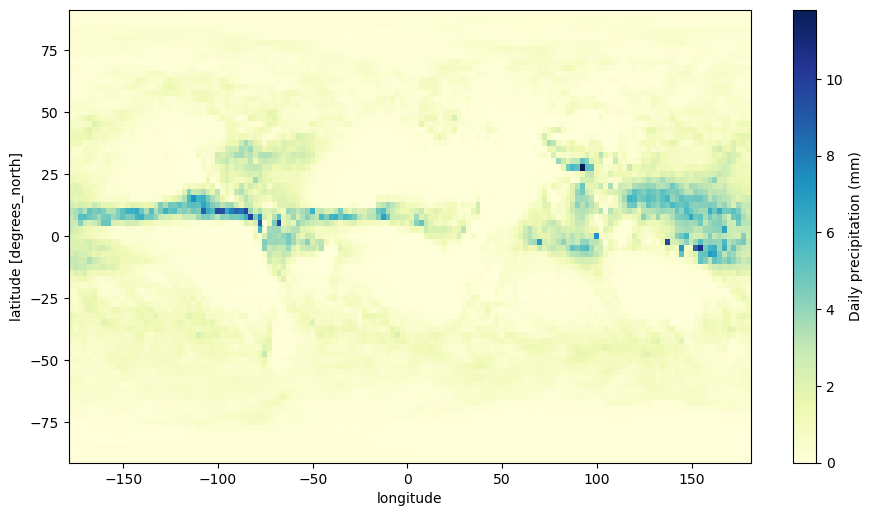

In [51]:
# plot the mean precipitation
ppt_daily.name = 'Daily precipitation (mm)'
ppt_daily['longitude'] = list(map(lambda x: x if x<=180 else x-360, ppt_daily['longitude'].values))
fig, ax = plt.subplots(figsize=(11, 6))
(ppt_daily.mean('time') * 1000).sortby('longitude').plot(ax=ax, cmap='YlGnBu') # sortby method

In [52]:
print(ppt_daily.latitude)

<xarray.DataArray 'latitude' (latitude: 73)>
array([ 90. ,  87.5,  85. ,  82.5,  80. ,  77.5,  75. ,  72.5,  70. ,  67.5,
        65. ,  62.5,  60. ,  57.5,  55. ,  52.5,  50. ,  47.5,  45. ,  42.5,
        40. ,  37.5,  35. ,  32.5,  30. ,  27.5,  25. ,  22.5,  20. ,  17.5,
        15. ,  12.5,  10. ,   7.5,   5. ,   2.5,   0. ,  -2.5,  -5. ,  -7.5,
       -10. , -12.5, -15. , -17.5, -20. , -22.5, -25. , -27.5, -30. , -32.5,
       -35. , -37.5, -40. , -42.5, -45. , -47.5, -50. , -52.5, -55. , -57.5,
       -60. , -62.5, -65. , -67.5, -70. , -72.5, -75. , -77.5, -80. , -82.5,
       -85. , -87.5, -90. ], dtype=float32)
Coordinates:
  * latitude  (latitude) float32 90.0 87.5 85.0 82.5 ... -82.5 -85.0 -87.5 -90.0
Attributes:
    units:      degrees_north
    long_name:  latitude


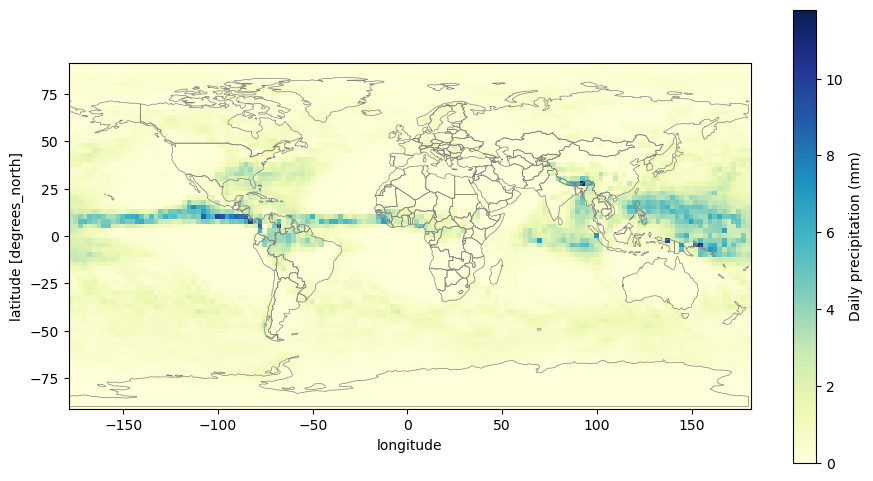

<Figure size 600x400 with 0 Axes>

In [53]:
# add world plot
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax, facecolor='none', edgecolor='grey', linewidth=0.5)
fig

## interpolation

In [54]:
# Total column water
water = ecmwf.tcw.resample(time='D').mean()[:6, :2, :2]
print(water)

<xarray.DataArray 'tcw' (time: 6, latitude: 2, longitude: 2)>
array([[[10.15271  , 10.15271  ],
        [12.084702 , 12.195412 ]],

       [[10.667099 , 10.667099 ],
        [ 9.643726 ,  9.657227 ]],

       [[11.292194 , 11.292194 ],
        [12.967667 , 12.946064 ]],

       [[ 9.981251 ,  9.981251 ],
        [ 9.684227 ,  9.692329 ]],

       [[ 9.780083 ,  9.780083 ],
        [ 9.635624 ,  9.4371605]],

       [[12.293968 , 12.293968 ],
        [12.701696 , 12.584238 ]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 2002-07-01 2002-07-02 ... 2002-07-06
  * longitude  (longitude) float32 0.0 2.5
  * latitude   (latitude) float32 90.0 87.5


In [ ]:
# get the precipitation at noon
print(water.interp(time=['2002-07-01 12:00', '2002-07-02 12:00']))

In [56]:
# get lincoln's values based on its coordinates
lincoln = -96.717118, 40.861633
lincoln_nearest = ecmwf.tcw[0].sel(dict(latitude=lincoln[1], longitude=360+lincoln[0]), method='nearest')
lincoln_interp = ecmwf.tcw[0].interp(latitude=lincoln[1], longitude=360+lincoln[0])
print(lincoln_nearest, '\n')
print(lincoln_interp)

<xarray.DataArray 'tcw' ()>
array(32.54949, dtype=float32)
Coordinates:
    longitude  float32 262.5
    latitude   float32 40.0
    time       datetime64[ns] 2002-07-01T12:00:00
Attributes:
    units:      kg m**-2
    long_name:  Total column water 

<xarray.DataArray 'tcw' ()>
array(32.73238812)
Coordinates:
    time       datetime64[ns] 2002-07-01T12:00:00
    latitude   float64 40.86
    longitude  float64 263.3
Attributes:
    units:      kg m**-2
    long_name:  Total column water


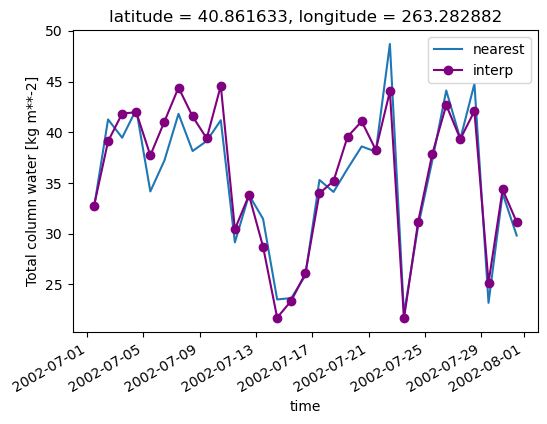

In [57]:
ecmwf = xr.open_dataset("../data/ECMWF_ERA-40_subset.nc")
fig, ax = plt.subplots()
ecmwf.tcw.sel(dict(latitude=lincoln[1], longitude=360+lincoln[0]), method='nearest').dropna('time').plot(ax=ax, label='nearest')
ecmwf.tcw.interp(latitude=lincoln[1], longitude=360+lincoln[0]).dropna('time').plot(ax=ax, label='interp', color='purple', marker='o')
ax.legend()

In [58]:
print(ecmwf.tcw.sel(dict(latitude=lincoln[1], longitude=360+lincoln[0]), method='nearest'))

<xarray.DataArray 'tcw' (time: 62)>
array([32.54949 ,       nan, 41.264374,       nan, 39.461994,       nan,
       42.256695,       nan, 34.16961 ,       nan, 37.22083 ,       nan,
       41.820614,       nan, 38.148346,       nan, 39.13797 ,       nan,
       41.18742 ,       nan, 29.147243,       nan, 33.82128 ,       nan,
       31.464012,       nan, 23.521383,       nan, 23.653694,       nan,
       25.869204,       nan, 35.29964 ,       nan, 34.118305,       nan,
       36.418873,       nan, 38.60468 ,       nan, 38.088943,       nan,
       48.704765,       nan, 22.071379,       nan, 30.698505,       nan,
       37.151974,       nan, 44.11713 ,       nan, 39.349934,       nan,
       44.78138 ,       nan, 23.18656 ,       nan, 33.968445,       nan,
       29.818241,       nan], dtype=float32)
Coordinates:
    longitude  float32 262.5
    latitude   float32 40.0
  * time       (time) datetime64[ns] 2002-07-01T12:00:00 ... 2002-07-31T18:00:00
Attributes:
    units:      kg m**-2
 

## Combining data

In [59]:
# concat
a = water[:3]
b = water[3:6]
print(a, '\n', b)

<xarray.DataArray 'tcw' (time: 3, latitude: 2, longitude: 2)>
array([[[10.15271 , 10.15271 ],
        [12.084702, 12.195412]],

       [[10.667099, 10.667099],
        [ 9.643726,  9.657227]],

       [[11.292194, 11.292194],
        [12.967667, 12.946064]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 2002-07-01 2002-07-02 2002-07-03
  * longitude  (longitude) float32 0.0 2.5
  * latitude   (latitude) float32 90.0 87.5 
 <xarray.DataArray 'tcw' (time: 3, latitude: 2, longitude: 2)>
array([[[ 9.981251 ,  9.981251 ],
        [ 9.684227 ,  9.692329 ]],

       [[ 9.780083 ,  9.780083 ],
        [ 9.635624 ,  9.4371605]],

       [[12.293968 , 12.293968 ],
        [12.701696 , 12.584238 ]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 2002-07-04 2002-07-05 2002-07-06
  * longitude  (longitude) float32 0.0 2.5
  * latitude   (latitude) float32 90.0 87.5


In [60]:
print(xr.concat([a, b], dim='time'))

<xarray.DataArray 'tcw' (time: 6, latitude: 2, longitude: 2)>
array([[[10.15271  , 10.15271  ],
        [12.084702 , 12.195412 ]],

       [[10.667099 , 10.667099 ],
        [ 9.643726 ,  9.657227 ]],

       [[11.292194 , 11.292194 ],
        [12.967667 , 12.946064 ]],

       [[ 9.981251 ,  9.981251 ],
        [ 9.684227 ,  9.692329 ]],

       [[ 9.780083 ,  9.780083 ],
        [ 9.635624 ,  9.4371605]],

       [[12.293968 , 12.293968 ],
        [12.701696 , 12.584238 ]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 90.0 87.5
  * longitude  (longitude) float32 0.0 2.5
  * time       (time) datetime64[ns] 2002-07-01 2002-07-02 ... 2002-07-06


In [61]:
print(xr.concat([a, b], dim='newdim')) # fill nan

<xarray.DataArray 'tcw' (newdim: 2, time: 6, latitude: 2, longitude: 2)>
array([[[[10.15271  , 10.15271  ],
         [12.084702 , 12.195412 ]],

        [[10.667099 , 10.667099 ],
         [ 9.643726 ,  9.657227 ]],

        [[11.292194 , 11.292194 ],
         [12.967667 , 12.946064 ]],

        [[       nan,        nan],
         [       nan,        nan]],

        [[       nan,        nan],
         [       nan,        nan]],

        [[       nan,        nan],
         [       nan,        nan]]],


       [[[       nan,        nan],
         [       nan,        nan]],

        [[       nan,        nan],
         [       nan,        nan]],

        [[       nan,        nan],
         [       nan,        nan]],

        [[ 9.981251 ,  9.981251 ],
         [ 9.684227 ,  9.692329 ]],

        [[ 9.780083 ,  9.780083 ],
         [ 9.635624 ,  9.4371605]],

        [[12.293968 , 12.293968 ],
         [12.701696 , 12.584238 ]]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float3

In [62]:
# merge
print(xr.merge([a, b]))

<xarray.Dataset>
Dimensions:    (latitude: 2, longitude: 2, time: 6)
Coordinates:
  * time       (time) datetime64[ns] 2002-07-01 2002-07-02 ... 2002-07-06
  * longitude  (longitude) float32 0.0 2.5
  * latitude   (latitude) float32 90.0 87.5
Data variables:
    tcw        (time, latitude, longitude) float32 10.15271 ... 12.584238


In [63]:
print(xr.merge([a, b.rename('tcw1')]))

<xarray.Dataset>
Dimensions:    (latitude: 2, longitude: 2, time: 6)
Coordinates:
  * time       (time) datetime64[ns] 2002-07-01 2002-07-02 ... 2002-07-06
  * longitude  (longitude) float32 0.0 2.5
  * latitude   (latitude) float32 90.0 87.5
Data variables:
    tcw        (time, latitude, longitude) float32 10.15271 10.15271 ... nan nan
    tcw1       (time, latitude, longitude) float32 nan nan ... 12.584238


## groupby method

In [65]:
# create a new variable in the dataset
ecmwf = xr.open_dataset("../data/ECMWF_ERA-40_subset.nc")
ecmwf['world'] = (("latitude", "longitude"), np.zeros([ecmwf.latitude.shape[0], ecmwf.longitude.shape[0]]))
print(ecmwf)

<xarray.Dataset>
Dimensions:    (latitude: 73, longitude: 144, time: 62)
Coordinates:
  * longitude  (longitude) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * latitude   (latitude) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * time       (time) datetime64[ns] 2002-07-01T12:00:00 ... 2002-07-31T18:00:00
Data variables:
    tcw        (time, latitude, longitude) float32 ...
    tcwv       (time, latitude, longitude) float32 ...
    lsp        (time, latitude, longitude) float32 ...
    cp         (time, latitude, longitude) float32 ...
    msl        (time, latitude, longitude) float32 ...
    blh        (time, latitude, longitude) float32 ...
    tcc        (time, latitude, longitude) float32 ...
    p10u       (time, latitude, longitude) float32 ...
    p10v       (time, latitude, longitude) float32 ...
    p2t        (time, latitude, longitude) float32 ...
    p2d        (time, latitude, longitude) float32 ...
    e          (time, latitude, longitude) float32 ...
  

C:\Miniconda3\lib\site-packages\geopandas\tools\sjoin.py:61: UserWarning: CRS of frames being joined does not match!(None != epsg:4326)
  "(%s != %s)" % (left_df.crs, right_df.crs)


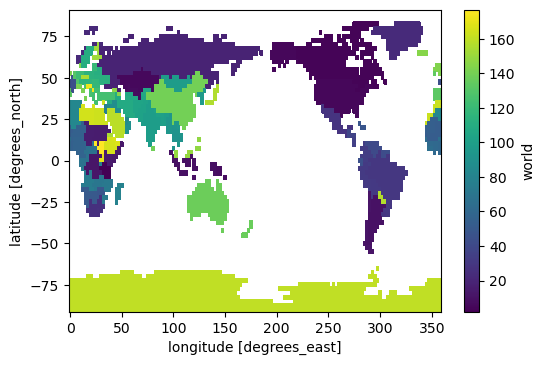

In [66]:
# assign the values based on the index in world
from shapely.geometry import Point


world_pnt = gpd.GeoDataFrame(geometry=[Point(z[1] if z[1]<=180 else z[1]-360, z[0]) \
                           for z in ecmwf['world'].stack(z=("latitude", "longitude")).z.values])

# intersection to find the country
world_pnt = gpd.sjoin(world_pnt, world)
world_pnt.index_right += 1
w = ecmwf['world'].values.flatten()
w[world_pnt.index] = world_pnt.index_right
w = w.reshape(ecmwf['world'].shape)
ecmwf['world'][:] = np.where(w>0,w,np.nan)
ecmwf['world'].plot()

In [67]:
print(ecmwf['world'])

<xarray.DataArray 'world' (latitude: 73, longitude: 144)>
array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ...,
       [160., 160., 160., ..., 160., 160., 160.],
       [160., 160., 160., ..., 160., 160., 160.],
       [160., 160., 160., ..., 160., 160., 160.]])
Coordinates:
  * longitude  (longitude) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * latitude   (latitude) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0


In [68]:
# set coords
ecmwf = ecmwf.set_coords('world')
print(ecmwf)

<xarray.Dataset>
Dimensions:    (latitude: 73, longitude: 144, time: 62)
Coordinates:
  * longitude  (longitude) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * latitude   (latitude) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * time       (time) datetime64[ns] 2002-07-01T12:00:00 ... 2002-07-31T18:00:00
    world      (latitude, longitude) float64 nan nan nan ... 160.0 160.0 160.0
Data variables:
    tcw        (time, latitude, longitude) float32 ...
    tcwv       (time, latitude, longitude) float32 ...
    lsp        (time, latitude, longitude) float32 ...
    cp         (time, latitude, longitude) float32 ...
    msl        (time, latitude, longitude) float32 ...
    blh        (time, latitude, longitude) float32 ...
    tcc        (time, latitude, longitude) float32 ...
    p10u       (time, latitude, longitude) float32 ...
    p10v       (time, latitude, longitude) float32 ...
    p2t        (time, latitude, longitude) float32 ...
    p2d        (time, latitude, l

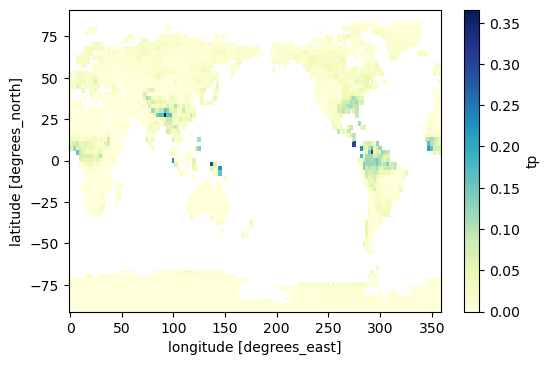

In [69]:
# plot
ecmwf.tp.sum(dim='time').where(ecmwf.world > 0).plot(cmap='YlGnBu')

In [70]:
# groupby
print(ecmwf.tp.sum(dim='time').groupby('world').mean())

<xarray.DataArray 'tp' (world: 143)>
array([6.60087562e-06, 1.69275291e-02, 2.47812811e-02, 4.19770321e-03,
       6.90995803e-05, 9.19330418e-02, 4.29821238e-02, 9.90314875e-03,
       2.23770943e-02, 2.56448817e-02, 1.84914260e-03, 2.29079439e-03,
       7.45030399e-03, 1.02859465e-02, 1.02643128e-02, 1.49269560e-02,
       7.73275224e-03, 4.99811862e-03, 9.76510346e-04, 2.15749126e-02,
       2.86180675e-02, 4.01632562e-02, 3.33931483e-02, 4.16760966e-02,
       9.79432613e-02, 2.98761457e-01, 8.72731805e-02, 8.30383226e-02,
       6.32014647e-02, 9.59109440e-02, 1.15394734e-01, 8.17571729e-02,
       2.06421800e-02, 2.19984297e-02, 7.49658272e-02, 4.84062126e-03,
       1.67705584e-04, 0.00000000e+00, 5.97905032e-02, 2.39955988e-02,
       1.65346882e-03, 5.71282804e-02, 5.61833801e-03, 6.09729998e-02,
       6.80867434e-02, 5.80552220e-02, 7.40002617e-02, 1.37584284e-01,
       8.29746425e-02, 1.57686874e-01, 2.07362428e-01, 4.49303575e-02,
       3.37095931e-02, 4.09166887e-02, 3

## facet plotting

C:\Miniconda3\lib\site-packages\xarray\core\resample.py:176: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  super().__init__(*args, **kwargs)


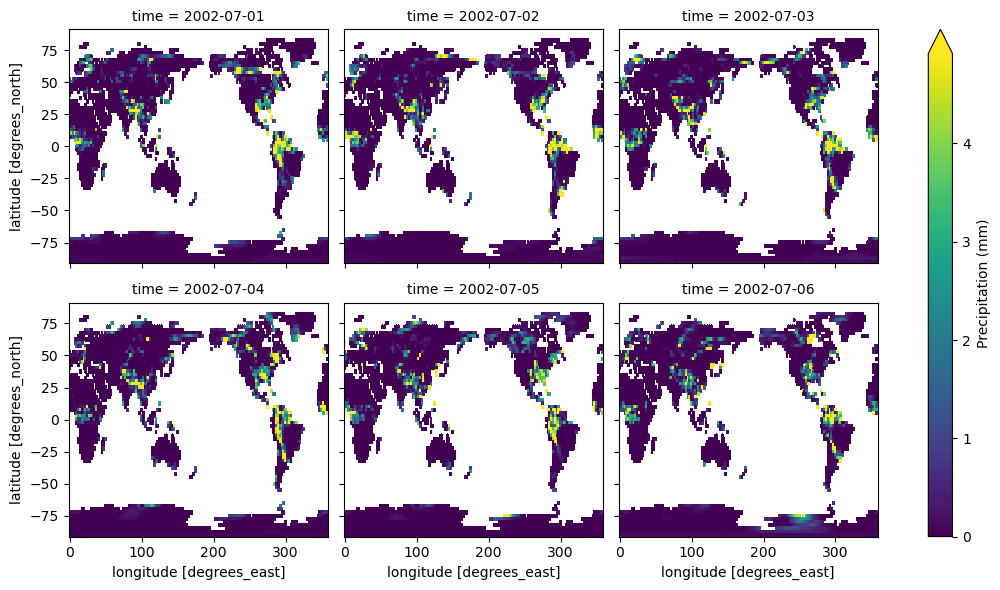

In [71]:
ppt = ecmwf.tp.resample(time='D').sum()[:6].where(ecmwf.world > 0) * 1000
ppt.plot(col='time', col_wrap=3, figsize=(11, 6), robust=True, cbar_kwargs={'label': 'Precipitation (mm)'})

# Cartopy

In [72]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

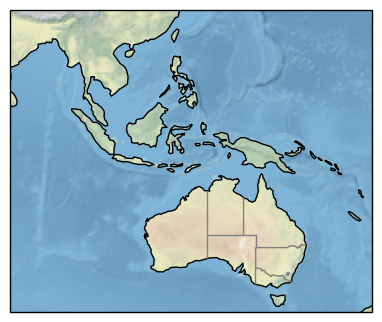

In [73]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([80, 170, -45, 30], crs=ccrs.PlateCarree())

# Put a background image on for nice sea rendering.
ax.stock_img()

# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')


ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(states_provinces, edgecolor='gray')

## Make publication figure using cartopy

In [74]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import matplotlib.ticker as mticker

import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


import xarray as xr
import numpy as np

cart_proj = ccrs.Mercator(central_longitude=-101.0)



def plot_domain(ax, lonlim, latlim, obj_proj, text, color='blue', linewidth=3.0, rx=0.05, ry=0.95):
    xy = obj_proj.transform_points(ccrs.PlateCarree(), np.array(lonlim), np.array(latlim))
    ax.add_patch(mpl.patches.Rectangle((xy[0, 0], xy[0, 1]), xy[1, 0]-xy[0, 0], xy[1, 1]-xy[0, 1],
                 fill=None, lw=linewidth, edgecolor=color, zorder=10))
    ax.text(lonlim[0]+(lonlim[1]-lonlim[0])*rx, latlim[0]+(latlim[1]-latlim[0])*ry, text, va='top', ha='left',
            size=15, color=color, zorder=10, transform=ccrs.PlateCarree())
     

In [75]:
# read data    
dem0 = xr.open_dataset(r'C:\Users\Michael Ou\Downloads\ETOPO1_Ice_g_gmt4.grd\ETOPO1_Ice_g_gmt4.grd')
hp_shp = Reader(r'D:\HydroDATA\High_Plains\Boundary\high_plain_aquifer.shp')

In [76]:
extent = -132, -60, 10, 60
dem = dem0['z'].loc[extent[2]:extent[3], extent[0]:extent[1]]
dem_lons, dem_lats = np.meshgrid(dem['x'], dem['y'])

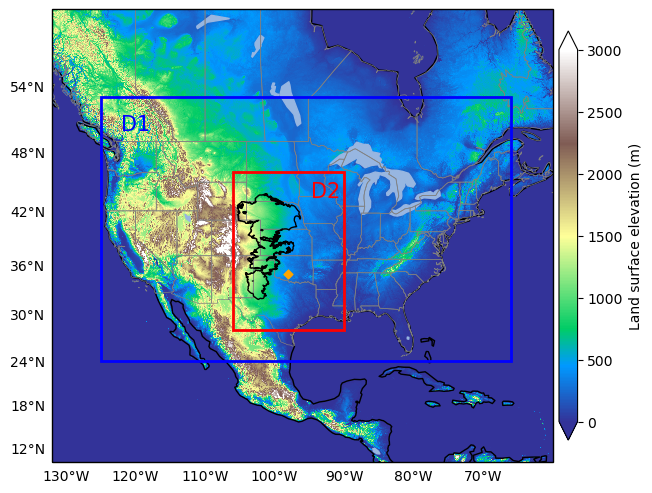

In [78]:
washita = -98.1, 34.9

xlim_d01 = -125, -66
ylim_d01 = 24, 53

xlim_d02 = -106, -90
ylim_d02 = 28, 46


cmap = plt.get_cmap('terrain')



fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1, projection=cart_proj)
ax.set_extent(extent, crs=ccrs.PlateCarree())
ax.stock_img()
img=ax.pcolormesh(dem_lons, dem_lats, dem.values, cmap='terrain', vmin=0, vmax=3000, alpha=1, transform=ccrs.PlateCarree())
# Put a background image on for nice sea rendering.
#ax.stock_img()

# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_shp',
        scale='50m',
        facecolor='none')

# domain box
plot_domain(ax, xlim_d01, ylim_d01, cart_proj, 'D1', color='blue', linewidth=2.0)
plot_domain(ax, xlim_d02, ylim_d02, cart_proj, 'D2', color='red', linewidth=2.0, rx=0.7)




#ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
#ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES)
ax.add_feature(states_provinces, edgecolor='gray', linewidth=0.5)
ax.add_feature(ShapelyFeature(hp_shp.geometries(),ccrs.PlateCarree(), edgecolor='black'), facecolor='none')

xy_washita = cart_proj.transform_point(*washita, ccrs.PlateCarree())
ax.scatter(*xy_washita, s=20, marker='D', c='orange')

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlines = False
gl.ylines = False
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
fig.colorbar(img, fraction=0.03, pad=0.01, extend='both', label='Land surface elevation (m)')